In [8]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from scipy import stats
import pandas as pd
from config import api_key

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [10]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [5.83, 4.94, 0.6, 9.81, 26, 27.49, 15.31, 10.49, 23.31, 21.52]


In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,5.83
1,London,51.5085,4.94
2,Oslo,59.9127,0.60
3,Beijing,39.9075,9.81
4,Mumbai,19.0144,26.00
5,Manila,14.6042,27.49
6,New York,40.7143,15.31
7,Seattle,47.6062,10.49
8,Dallas,32.7668,23.31
9,Taipei,25.0478,21.52


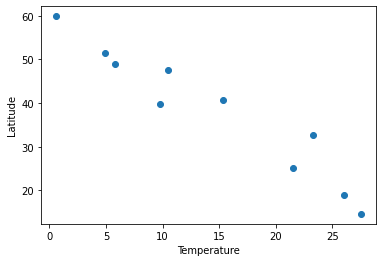

In [12]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data.iloc[:,2], weather_data.iloc[:,1])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

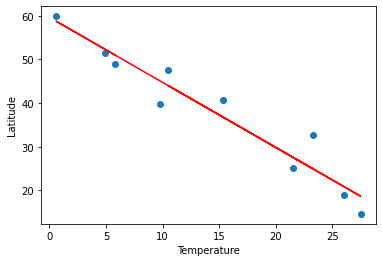

The r-squared is: 0.925059939014691


In [18]:
# Perform a linear regression on temperature vs. latitude

x_values = weather_data.iloc[:,2]
y_values = weather_data.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()


# Get regression values
print(f"The r-squared is: {rvalue**2}")

Text(6, 10, 'y = -1.49x + 59.66')

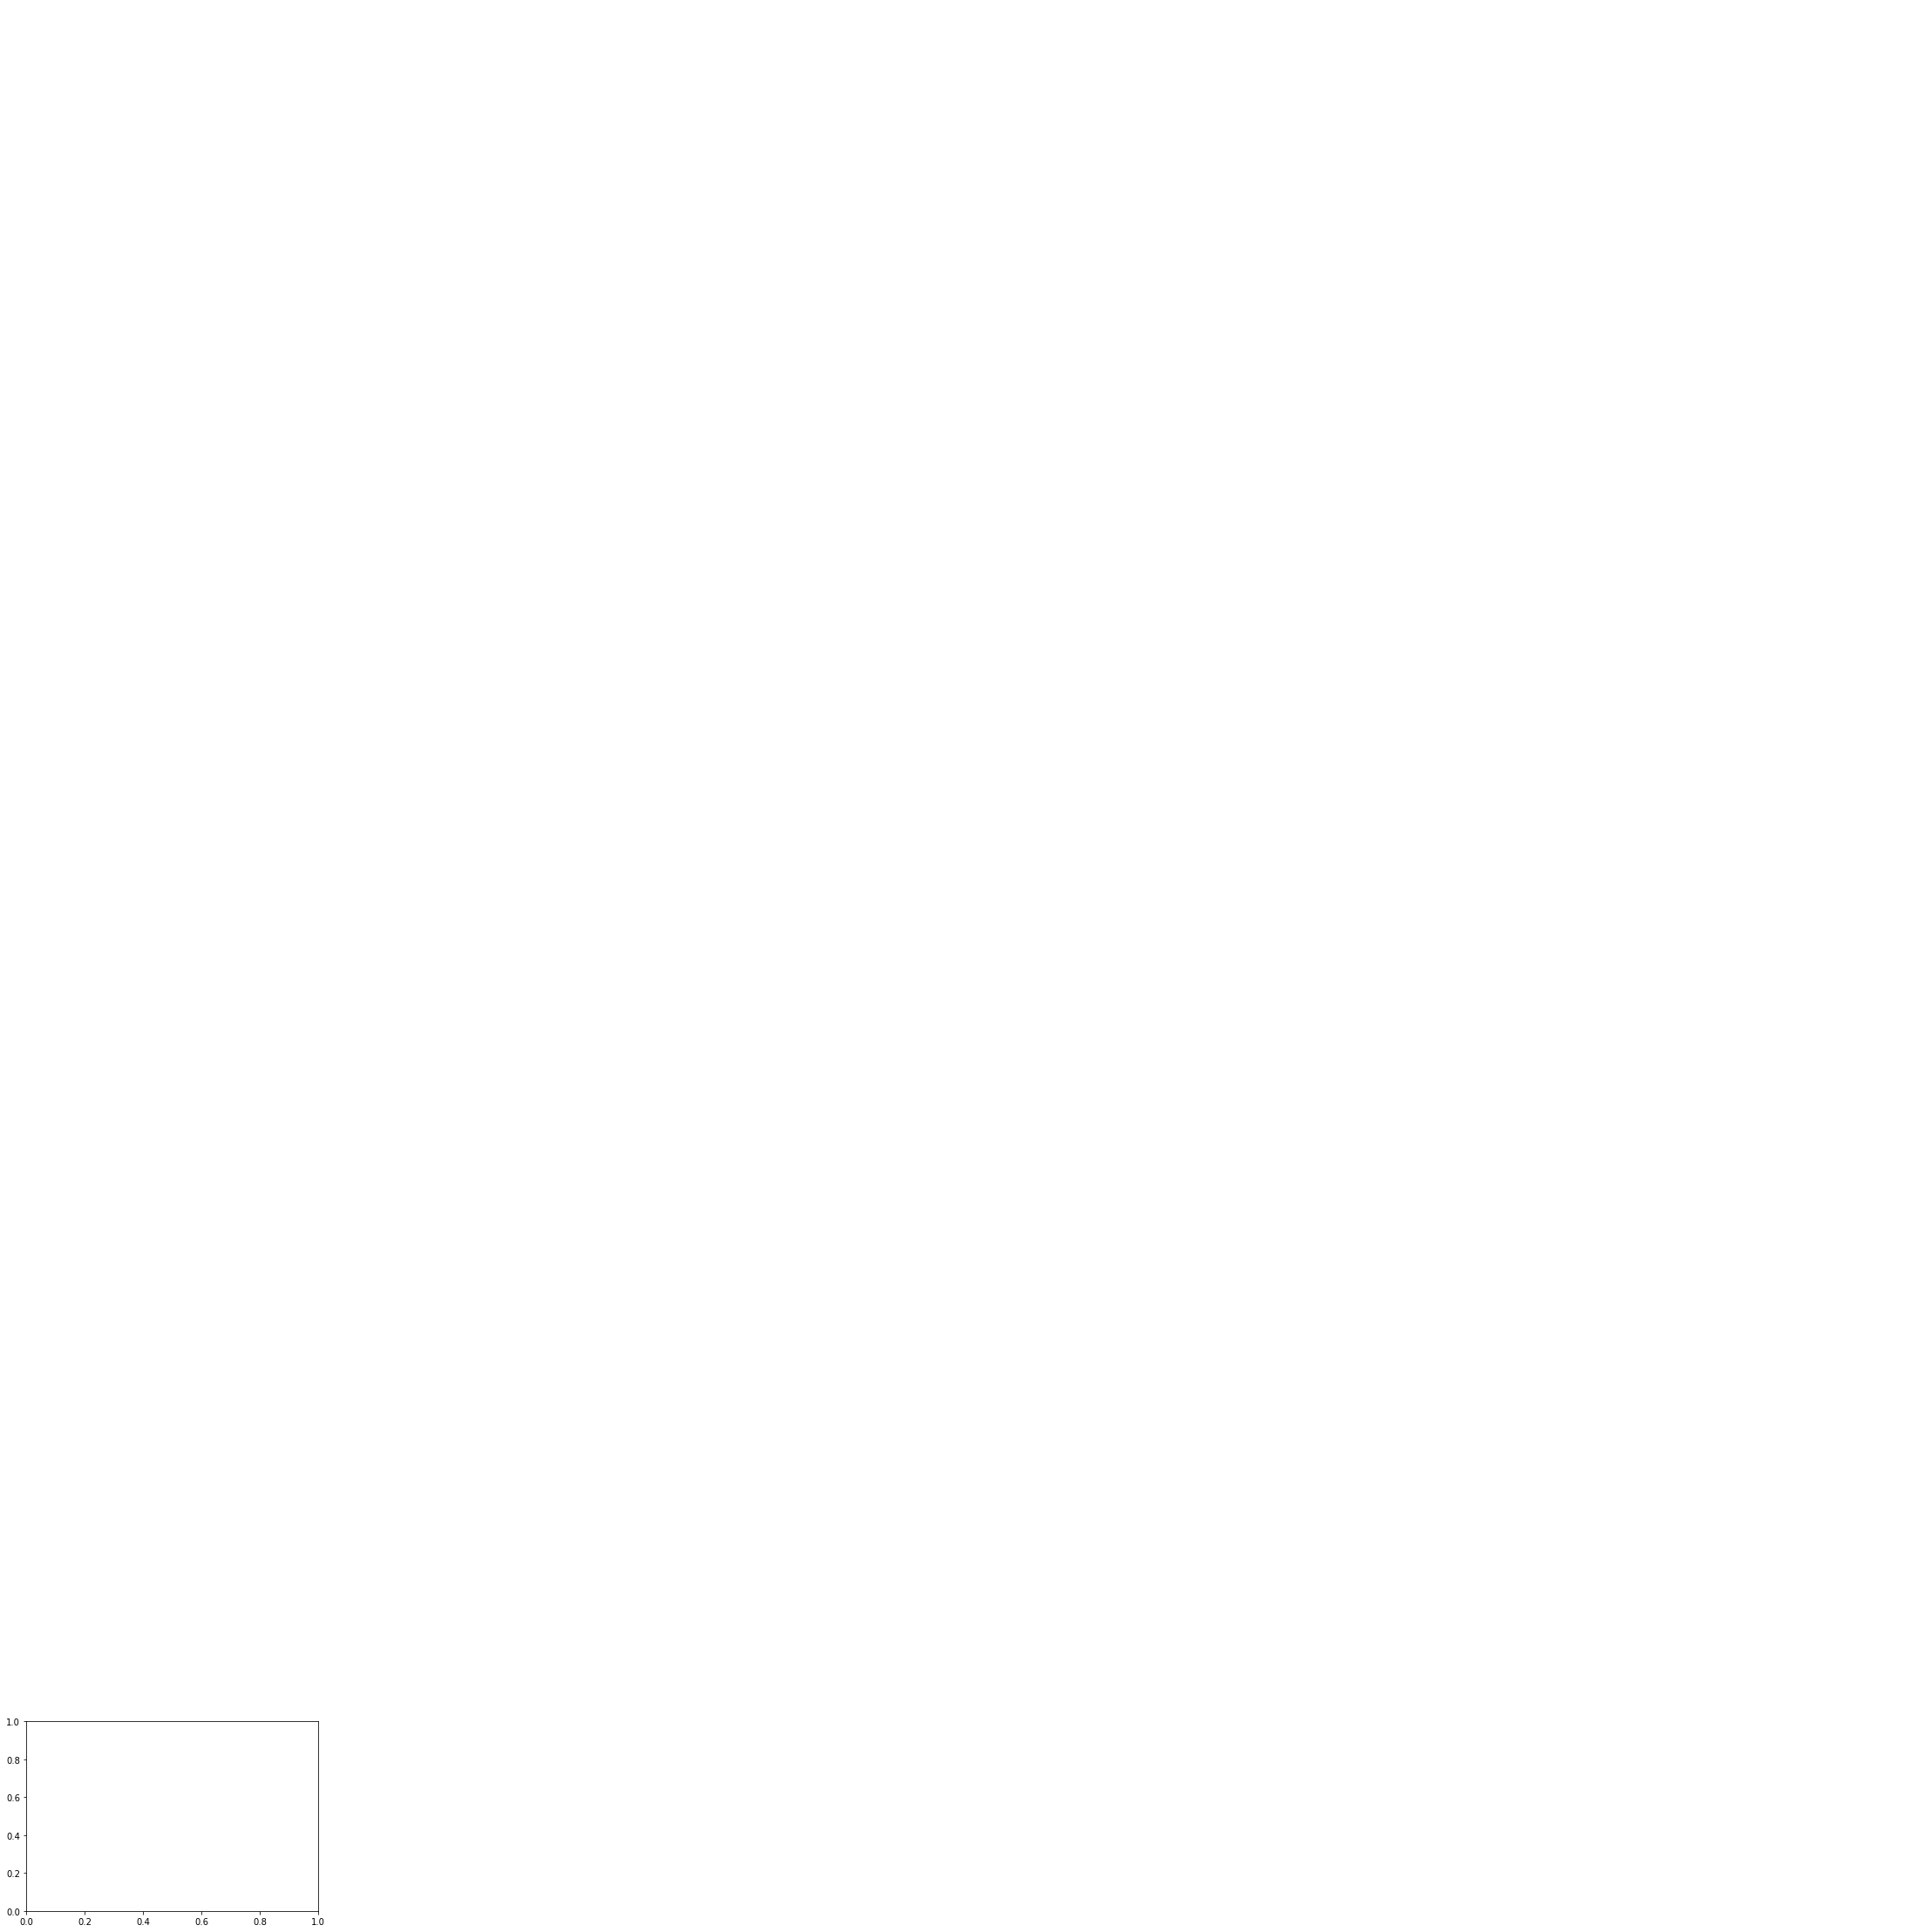

In [19]:
# Create line equation string
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [ ]:
# Create Plot


# Label plot and annotate the line equation


# Print r square value


# Show plot


In [ ]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees


In [ ]:
# Use API to determine actual temperature
